In [1]:
import pandas as pd

In [2]:
data_test = pd.read_csv("Continuous Data/test_data_continuous_Pos_for_Survival.csv")

In [17]:
non_standardized = pd.read_csv("non_discritized_states.csv",index_col=0)

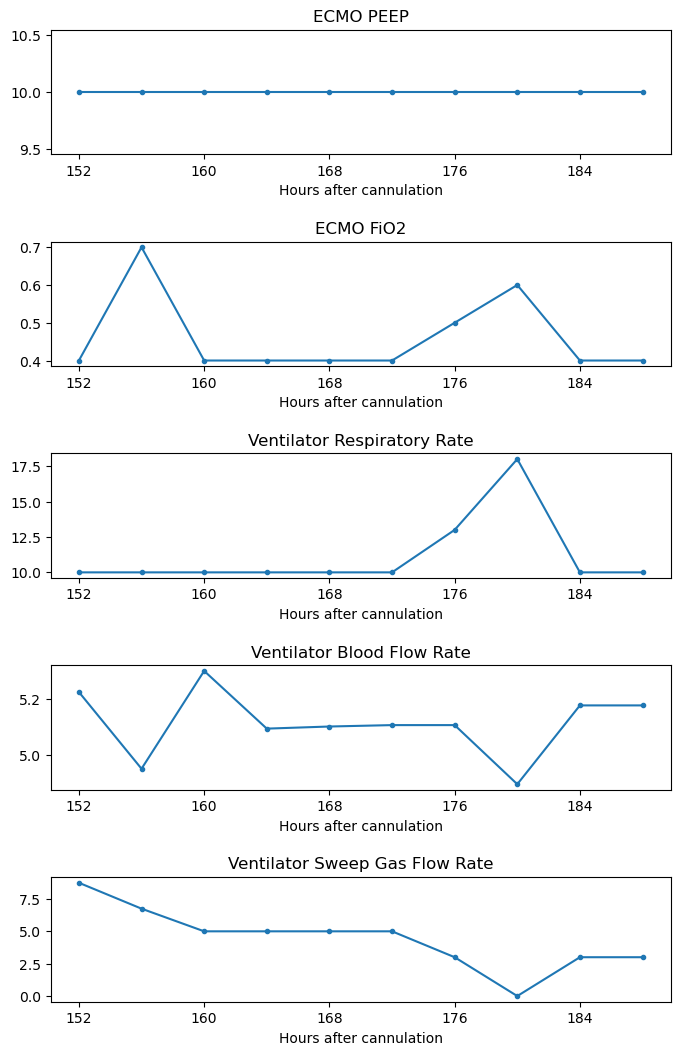

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

csn = 10017307254
row_range = slice(38,48)

selected_data = data_test.loc[data_test["csn"] == csn].reset_index(drop=True)
selected_data = selected_data.iloc[row_range]

non_standardized_selected = non_standardized.loc[non_standardized["csn"] == csn].reset_index(drop=True)
non_standardized_selected = non_standardized_selected.iloc[row_range]

fig, axs = plt.subplots(5, figsize=(8, 12))
axs[0].plot(selected_data["peep"], marker='o', markersize=3, label="clinician practices")
axs[0].set_title("ECMO PEEP")

axs[1].plot(selected_data["fio2"], marker='o', markersize=3, label="clinician practices")
axs[1].set_title("ECMO FiO2")

axs[2].plot(selected_data["vent_rate_set"], marker='o', markersize=3, label="clinician practices")
axs[2].set_title("Ventilator Respiratory Rate")

axs[3].plot(selected_data["flow"], marker='o', markersize=3, label="clinician practices")
axs[3].set_title("Ventilator Blood Flow Rate")

axs[4].plot(selected_data["sweep"], marker='o', markersize=3, label="clinician practices")
axs[4].set_title("Ventilator Sweep Gas Flow Rate")

# Function to multiply tick labels by 4
def multiply_by_4(x, pos):
    return int(x * 4)

# Apply the formatter and set x-axis labels
for ax in axs:
    ax.xaxis.set_major_formatter(FuncFormatter(multiply_by_4))
    ax.set_xlabel("Hours after cannulation")  # Set x-axis label
    
# Adjust the space between subplots and provide space for the super title
plt.subplots_adjust(hspace=0.7, top=0.92)  # Adjust 'top' to provide space for the super title

plt.savefig(f'patient {csn}.png')
non_standardized_selected.to_csv(f"patient {csn}.csv")

In [ ]:
test_data = 

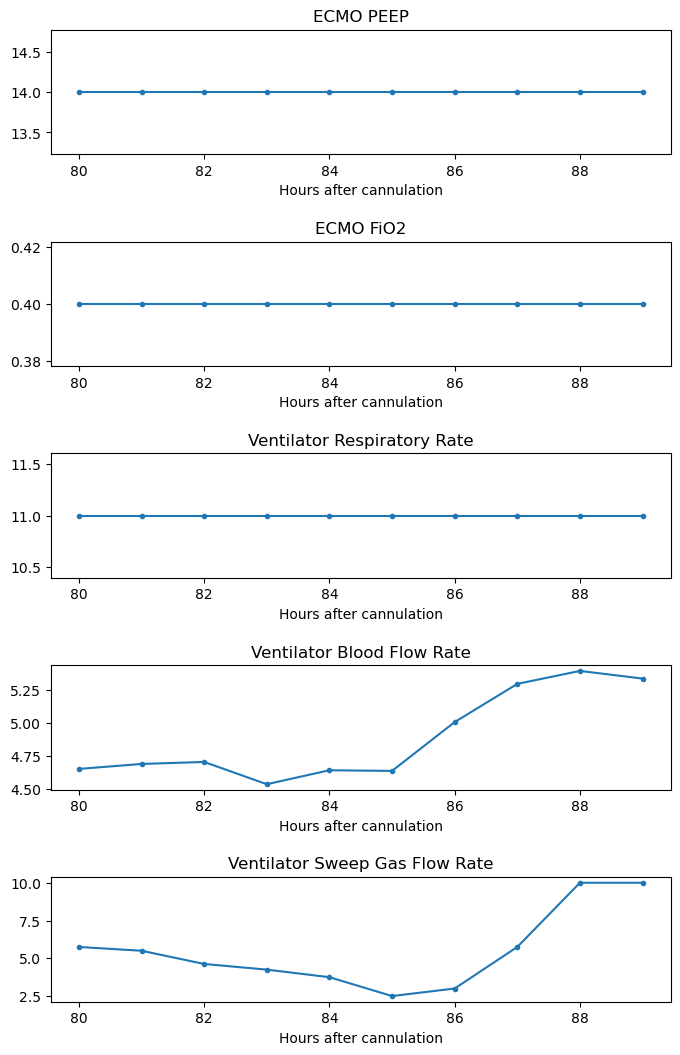

In [43]:
selected_data = data_test.loc[data_test["csn"] == 12256550300].reset_index(drop=True)
selected_data = selected_data.iloc[80:90]

fig, axs = plt.subplots(5, figsize=(8, 12))
axs[0].plot(selected_data["peep"], marker='o', markersize=3, label="clinician practices")
axs[0].set_title("ECMO PEEP")

axs[1].plot(selected_data["fio2"], marker='o', markersize=3, label="clinician practices")
axs[1].set_title("ECMO FiO2")

axs[2].plot(selected_data["vent_rate_set"], marker='o', markersize=3, label="clinician practices")
axs[2].set_title("Ventilator Respiratory Rate")

axs[3].plot(selected_data["flow"], marker='o', markersize=3, label="clinician practices")
axs[3].set_title("Ventilator Blood Flow Rate")

axs[4].plot(selected_data["sweep"], marker='o', markersize=3, label="clinician practices")
axs[4].set_title("Ventilator Sweep Gas Flow Rate")

# Function to multiply tick labels by 4
def multiply_by_4(x, pos):
    return int(x * 4)

# Apply the formatter and set x-axis labels
for ax in axs:
    # ax.xaxis.set_major_formatter(FuncFormatter(multiply_by_4))
    ax.set_xlabel("Hours after cannulation")  # Set x-axis label
    
# Adjust the space between subplots and provide space for the super title
plt.subplots_adjust(hspace=0.7, top=0.92)  # Adjust 'top' to provide space for the super title
    
plt.show()

In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.backends.backend_pdf import PdfPages

# Create a PdfPages object to save multiple figures into one PDF
pdf = PdfPages('all_patients_plots.pdf')

# Loop through each unique csn in data_test["csn"]
for csn in data_test["csn"].unique():
    selected_data = data_test.loc[data_test["csn"] == csn].reset_index(drop=True)
    
    fig, axs = plt.subplots(5, figsize=(8, 12))
    axs[0].plot(selected_data["peep"], marker='o', markersize=3, label="Clinician Practices")
    axs[0].set_title("ECMO PEEP")
    
    axs[1].plot(selected_data["fio2"], marker='o', markersize=3, label="Clinician Practices")
    axs[1].set_title("ECMO FiO2")
    
    axs[2].plot(selected_data["vent_rate_set"], marker='o', markersize=3, label="Clinician Practices")
    axs[2].set_title("Ventilator Respiratory Rate")
    
    axs[3].plot(selected_data["flow"], marker='o', markersize=3, label="Clinician Practices")
    axs[3].set_title("Ventilator Blood Flow Rate")
    
    axs[4].plot(selected_data["sweep"], marker='o', markersize=3, label="Clinician Practices")
    axs[4].set_title("Ventilator Sweep Gas Flow Rate")
    
    # Function to multiply tick labels by 4
    def multiply_by_4(x, pos):
        return int(x * 4)
    
    # Apply the formatter and set x-axis labels
    for ax in axs:
        ax.xaxis.set_major_formatter(FuncFormatter(multiply_by_4))
        ax.set_xlabel("Hours after cannulation")  # Set x-axis label
        
    # Adjust the space between subplots and provide space for the super title
    plt.subplots_adjust(hspace=0.7, top=0.92)
    
    # Add a super title with the csn number
    fig.suptitle(f'Patient {csn}', fontsize=16)
    
    # Save the current figure to the PDF
    pdf.savefig(fig)
    plt.close(fig)  # Close the figure after saving to free up memory

# Close the PDF object after saving all figures
pdf.close()
